In [56]:
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
# data cleaning
df=pd.read_csv(r"C:\Users\rahul\matplotlib_folder\projects\netflix_movies.csv")
df=df.dropna(subset=['type','release_year','rating','country','duration'])

## - Movies vs TV shows

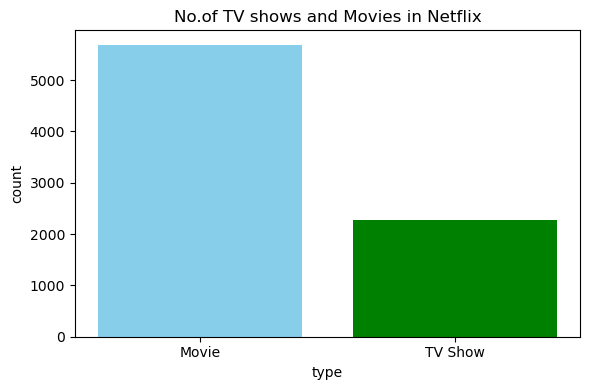

In [58]:
type_counts=df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.values,color=['skyblue','green'])
plt.title('No.of TV shows and Movies in Netflix')
plt.xlabel('type')
plt.ylabel('count')
plt.tight_layout()
plt.savefig('Movies vs TV shows.png')
plt.show()

## - Percentage of each content Rating

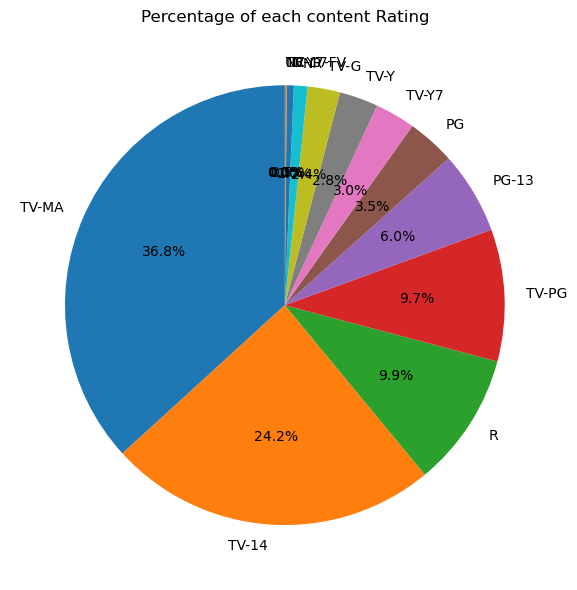

In [59]:
rating_count=df['rating'].value_counts()
plt.figure(figsize=[8,6])
plt.pie(rating_count,labels=rating_count.index,autopct='%1.1f%%',startangle=90)
plt.title('Percentage of each content Rating')
plt.tight_layout()
plt.savefig('Percentage of each content Rating.png')
plt.show()

## - Distribution of movies Durations

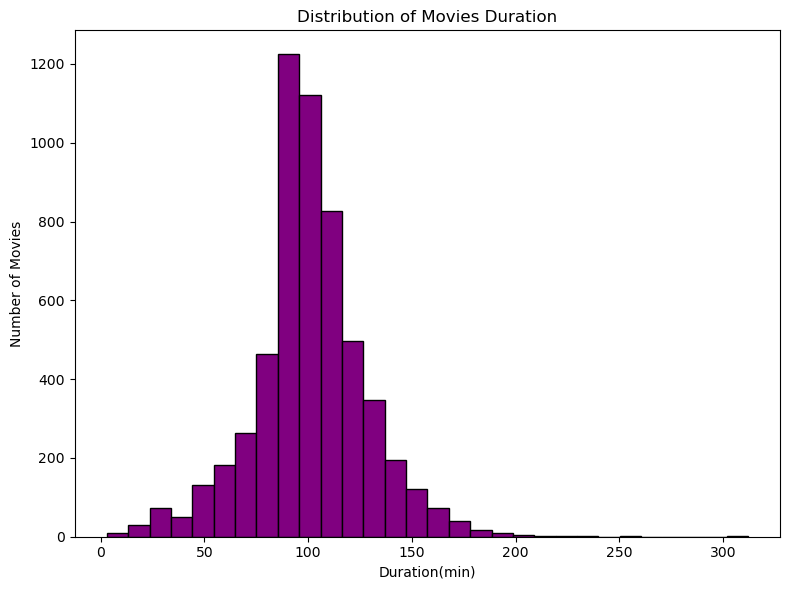

In [60]:
movies_df=df[df['type']=='Movie'].copy()
movies_df['duration_int']=movies_df['duration'].str.replace('min','').astype(int)
plt.figure(figsize=(8,6))
plt.hist(movies_df['duration_int'],bins=30,color='purple',edgecolor='black')
plt.title('Distribution of Movies Duration')
plt.xlabel('Duration(min)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('Distribution of movies Durations.png')
plt.show()

## - Relationship Between Release Year and No.of Shows

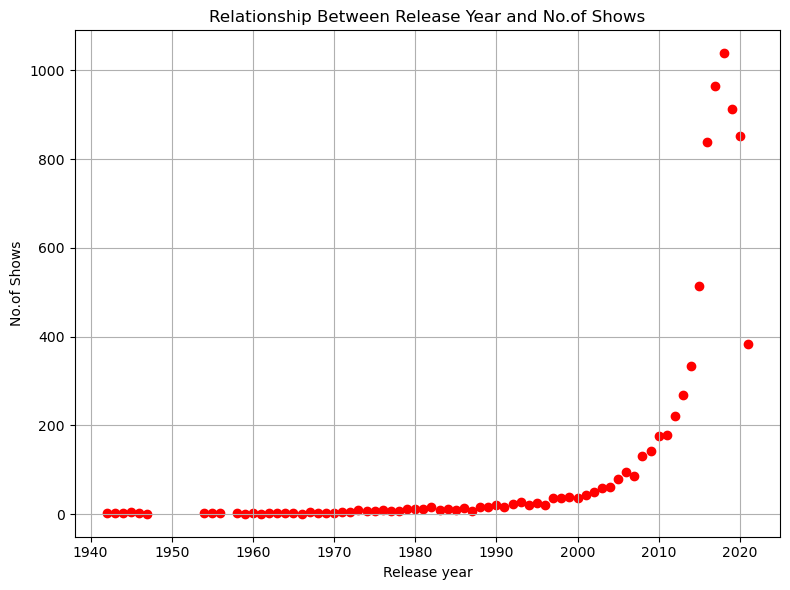

In [61]:
release_count=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(8,6))
plt.scatter(release_count.index,release_count.values,color='red')
plt.title('Relationship Between Release Year and No.of Shows')
plt.xlabel('Release year')
plt.ylabel('No.of Shows')
plt.grid(True)
plt.tight_layout()
plt.savefig('Relationship Between Release Year and No.of Shows.png')
plt.show()


## - Top 10 Countries with Highest No.of Shows

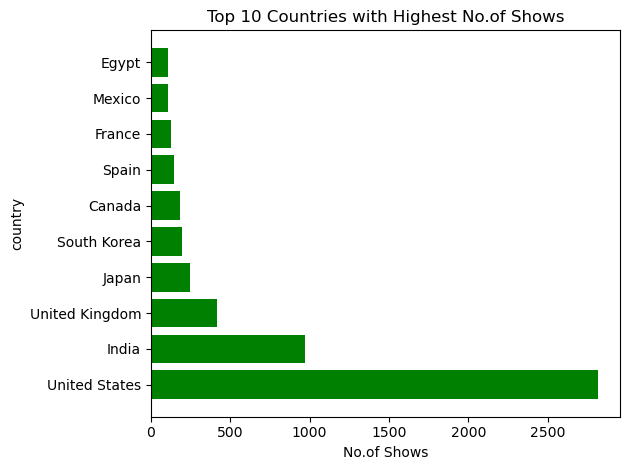

In [62]:
country_count=df['country'].value_counts().head(10)
plt.barh(country_count.index,country_count.values,color='green')
plt.title('Top 10 Countries with Highest No.of Shows')
plt.xlabel('No.of Shows')
plt.ylabel('country')
plt.tight_layout()
plt.tight_layout()
plt.savefig('Top 10 Countries with Highest No.of Shows.png')
plt.show()


## - Movies vs TV Shows Per Year

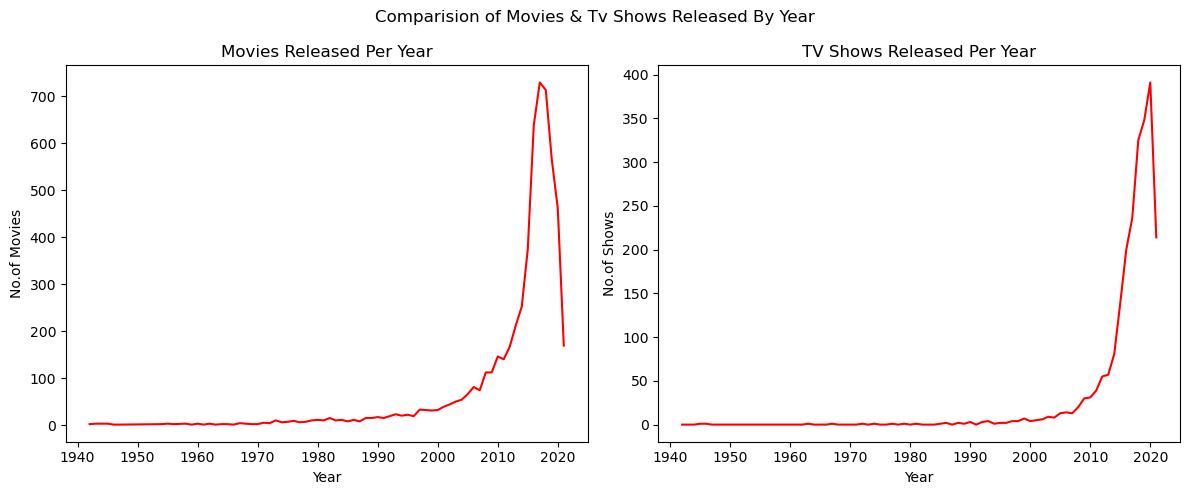

In [63]:
content_by_year=df.groupby(['release_year','type']).size().unstack().fillna(0)

fig,ax=plt.subplots(1,2,figsize=(12,5))

# first pyplot
ax[0].plot(content_by_year.index,content_by_year['Movie'],color='red')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('No.of Movies')

# second pyplot
ax[1].plot(content_by_year.index,content_by_year['TV Show'],color='red')
ax[1].set_title('TV Shows Released Per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('No.of Shows')

fig.suptitle('Comparision of Movies & Tv Shows Released By Year')
plt.tight_layout()
plt.savefig('Movies _TV Shows comparision.png')